In [183]:
# Import Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [184]:
# Import Dependencies
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [185]:
# Import Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [186]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [187]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the table
Base.prepare(autoload_with=engine)

In [188]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [189]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [190]:
# Create our session from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [191]:
# Find the most recent date in the data set. (2017-08-23)
last_date = session.query(func.max(measurement.date)).first()[0]
last_date

'2017-08-23'

In [192]:
# Calculate the date one year from the last date in data set.
date_format = '%Y-%m-%d'
last_date_obj = dt.datetime.strptime(last_date, date_format)
year_ago = dt.date(last_date_obj.year -1, last_date_obj.month, last_date_obj.day)
year_ago

datetime.date(2016, 8, 23)

In [193]:
# Perform a query to retrieve the data and precipitation scores
precip = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= '2016-08-23').\
    order_by(measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame.
df = pd.DataFrame(precip, columns=['date', 'precipitation'])
# Sort the dataframe by date
df = df.sort_values(by="date", ascending=True)
df = df.dropna()
df


,date,precipitation
2229,2016-08-23,0.70
2223,2016-08-23,0.00
2224,2016-08-23,0.15
2228,2016-08-23,1.79
2227,2016-08-23,0.02
...,...,...
4,2017-08-22,0.00
3,2017-08-23,0.45
2,2017-08-23,0.08
1,2017-08-23,0.00


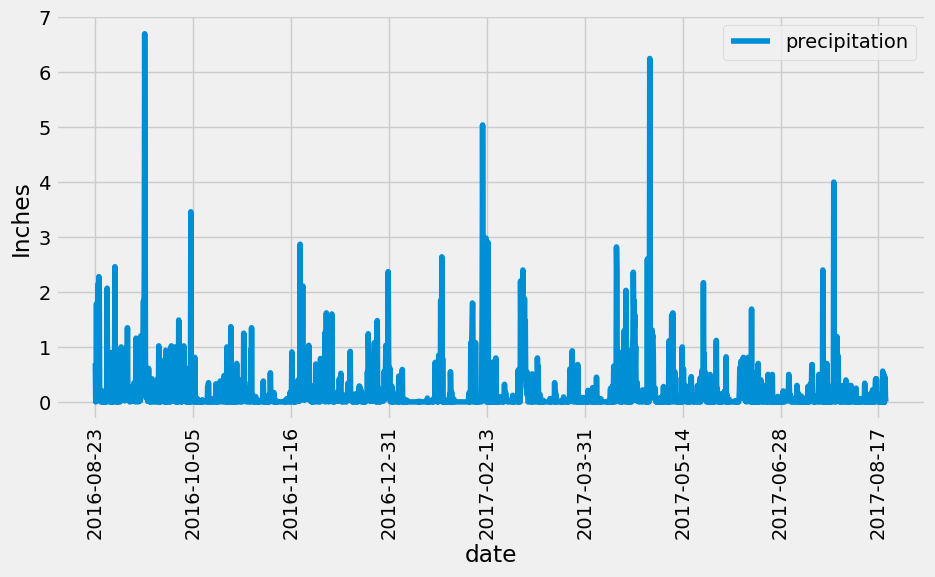

In [194]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='precipitation', ylabel="Inches", legend=True, figsize=(10,5))
plt.xticks(rotation=90)
plt.show();

In [195]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [196]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.id).count()

9

In [197]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(measurement.station, func.Count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.Count(measurement.station).desc()).all()

station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [198]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_activity[0][0]
session.query(func.Min(measurement.tobs), func.Max(measurement.tobs), func.Avg(measurement.tobs). \
    filter(measurement.station == most_active_station)).all()


[(53.0, 87.0, 71.66378066378067)]

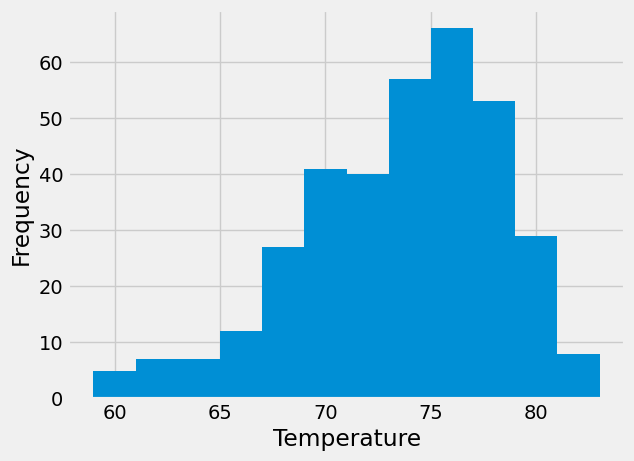

In [201]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_temps = session.query(measurement.tobs).\
    filter(measurement.date >= year_ago).\
        filter(measurement.station == active_station).all()

temp_df = pd.DataFrame(active_station_temps)
plt.hist(temp_df, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show();


# Close Session

In [202]:
# Close Session
session.close()